<a href="https://colab.research.google.com/github/anjaleeDS/CS06/blob/main/Lab3_line_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Line charts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data
import seaborn as sns

stocks = data.stocks()
stocks.shape, stocks.dtypes, stocks.info,  stocks['symbol'].value_counts()

((560, 3),
 symbol            object
 date      datetime64[ns]
 price            float64
 dtype: object,
 <bound method DataFrame.info of     symbol       date   price
 0     MSFT 2000-01-01   39.81
 1     MSFT 2000-02-01   36.35
 2     MSFT 2000-03-01   43.22
 3     MSFT 2000-04-01   28.37
 4     MSFT 2000-05-01   25.45
 ..     ...        ...     ...
 555   AAPL 2009-11-01  199.91
 556   AAPL 2009-12-01  210.73
 557   AAPL 2010-01-01  192.06
 558   AAPL 2010-02-01  204.62
 559   AAPL 2010-03-01  223.02
 
 [560 rows x 3 columns]>,
 MSFT    123
 AMZN    123
 IBM     123
 AAPL    123
 GOOG     68
 Name: symbol, dtype: int64)

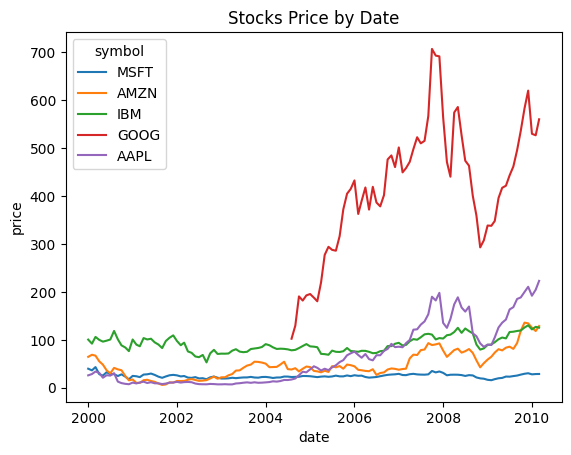

In [2]:
# plot the line
sns.lineplot(data = stocks, x='date', y = 'price', hue = 'symbol', legend="full")

# you get the axes labels and the legend for free by using sns
plt.title("Stocks Price by Date")
plt.show()

Found an updated data set for these stocks from 2013-2018

Copied on Kaggle [here](https://www.kaggle.com/datasets/camnugent/sandp500?select=all_stocks_5yr.csv)

In [12]:
appl = pd.read_csv("https://github.com/anjaleeDS/cs06/raw/main/AAPL_data.csv")
amzn = pd.read_csv("https://github.com/anjaleeDS/cs06/raw/main/AMZN_data.csv")
goog = pd.read_csv("https://github.com/anjaleeDS/cs06/raw/main/GOOG_data.csv")
ibm = pd.read_csv("https://github.com/anjaleeDS/cs06/raw/main/IBM_data.csv")
msft = pd.read_csv("https://github.com/anjaleeDS/cs06/raw/main/MSFT_data.csv")

In [39]:
df_stocks = pd.concat([appl, amzn, goog, ibm, msft])
df_stocks.Name.unique(), df_stocks.dtypes

(array(['AAPL', 'AMZN', 'GOOG', 'IBM', 'MSFT'], dtype=object),
 date       object
 open      float64
 high      float64
 low       float64
 close     float64
 volume      int64
 Name       object
 dtype: object)

<Axes: xlabel='date', ylabel='close'>

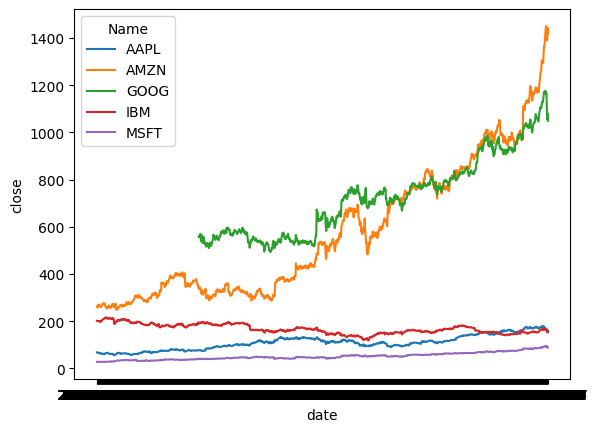

In [40]:
sns.lineplot(data=df_stocks, x='date', y='close', hue='Name')

In [34]:
# fixing the dates
df_stocks['date'] = pd.to_datetime(df_stocks['date'])
# without this change, the x axis will be treated like an object instead of a date

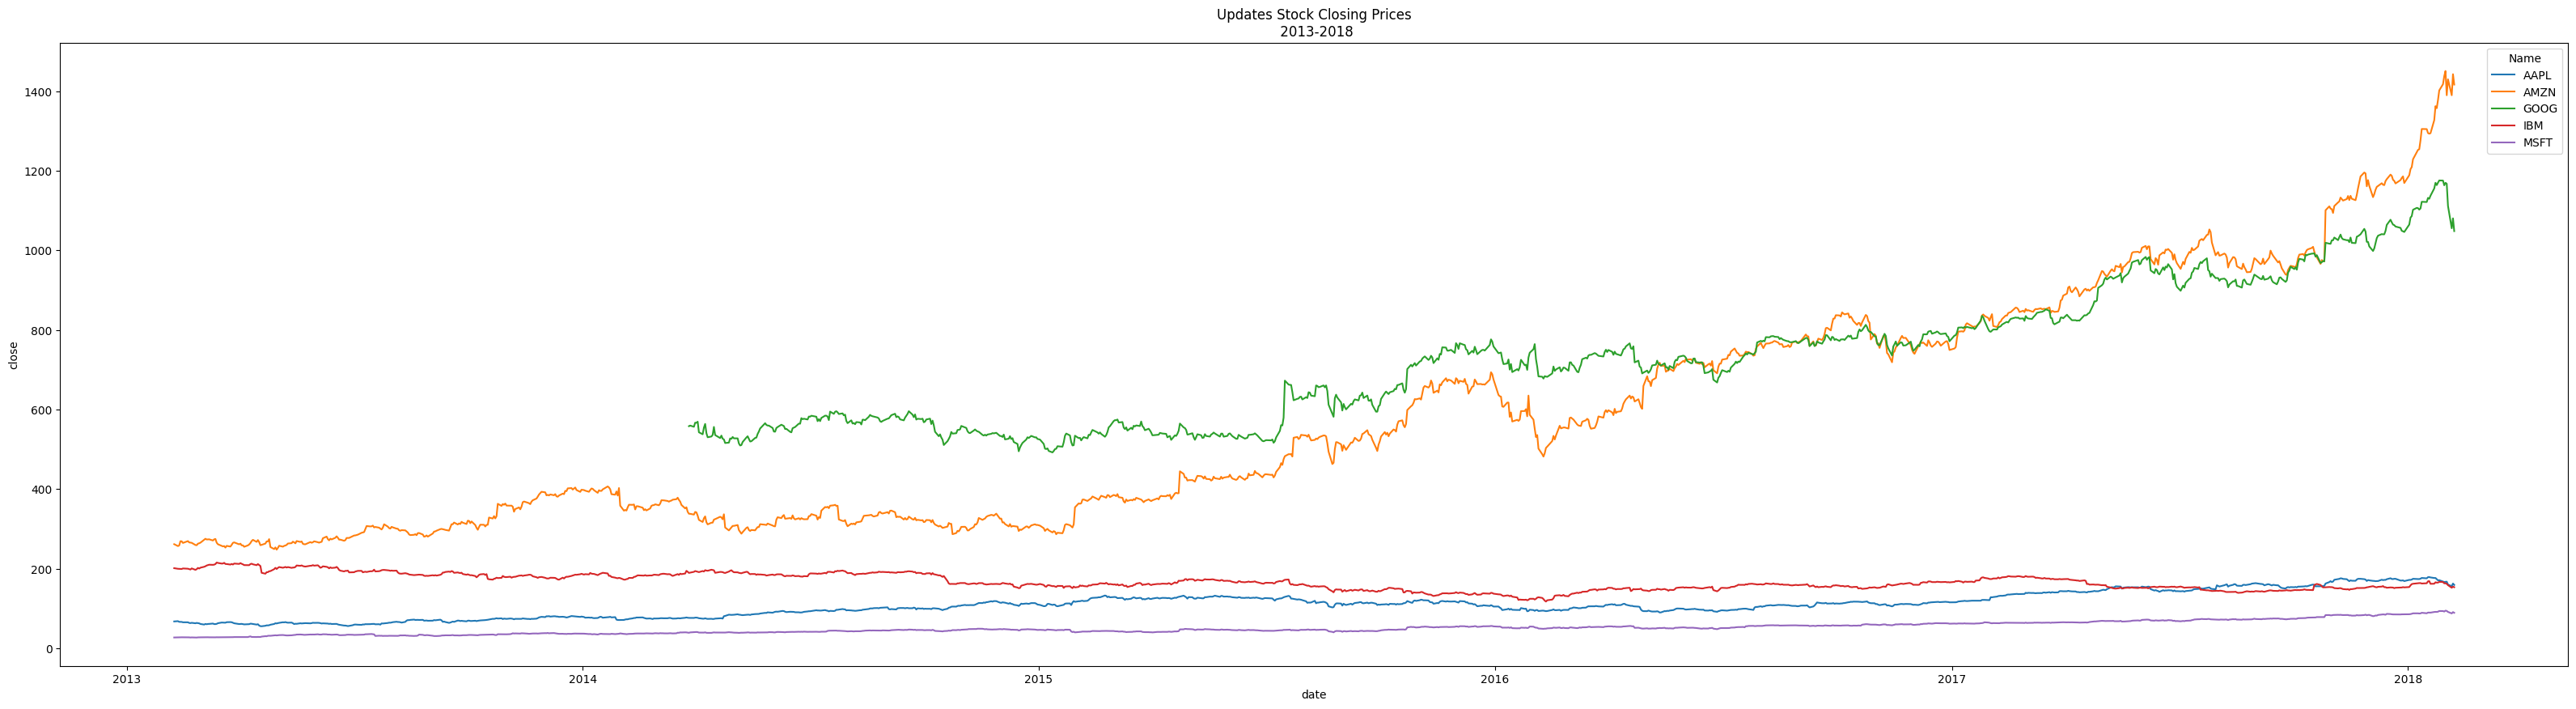

In [38]:
plt.figure(figsize=(40,10))
sns.lineplot(data=df_stocks, x='date', y='close',hue = 'Name')
plt.title("Updates Stock Closing Prices\n 2013-2018")
plt.show()

###Using data in json format from a webpage

[data source](https://data.sfgov.org/COVID-19/COVID-19-Deaths-by-Population-Characteristics-Over/kkr3-wq7h/about_data)

Looking for empty cells and add them together with

`df.isnull().sum()`

more information on finding nans [here](https://datatofish.com/rows-with-nan-pandas-dataframe/)

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data
import seaborn as sns
import numpy as np


# get data
sf_df = pd.read_json("https://data.sfgov.org/resource/g8m3-pdis.json")
# look at data
sf_df.shape, sf_df.dtypes, sf_df.isnull().sum() # are there nulls? sf_df.isnull().sum() would tell us by column how many there are


((1000, 32),
 ttxid                                 object
 certificate_number                     int64
 ownership_name                        object
 dba_name                              object
 full_business_address                 object
 city                                  object
 state                                 object
 business_zip                          object
 dba_start_date                        object
 dba_end_date                          object
 location_start_date                   object
 location_end_date                     object
 naic_code                             object
 naic_code_description                 object
 parking_tax                             bool
 transient_occupancy_tax                 bool
 supervisor_district                  float64
 neighborhoods_analysis_boundaries     object
 location                              object
 uniqueid                              object
 :@computed_region_6qbp_sg9q          float64
 :@computed_region_qg

In [42]:
# here are other ways to ask pandas to return records that have null or NaNs in them

sf_df[sf_df['city'].isnull()].head() # look at records that have city as null
sf_df[sf_df['city'].isnull() & sf_df['business_zip'].isnull()].head() # look at records that have city AND zip as null

,ttxid,certificate_number,ownership_name,dba_name,full_business_address,city,state,business_zip,dba_start_date,dba_end_date,...,:@computed_region_26cr_cadq,:@computed_region_ajp5_b2md,:@computed_region_jwn9_ihcz,mailing_address_1,mail_city,mail_zipcode,mail_state,lic,lic_code_description,business_corridor
21,1138191-02-171,1060494,Giuseppe Pennisi,Pioneer Seafoods,Pier 47 Al Scoma Way Fisherman Warf,NaN,NaN,NaN,2016-10-18T00:00:00.000,2020-05-01T00:00:00.000,...,3.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,1177815-02-181,475916,S F Public Utilities Comm,S F Public Utilites Comm,Great Highway & Taraval,NaN,NaN,NaN,2012-02-14T00:00:00.000,NaN,...,NaN,NaN,NaN,525 Golden Gate Ave Fl 13,San Francisco,94102.0,CA,H60,Wells And Well Water,NaN
311,1177817-02-181,475916,S F Public Utilities Comm,S F Public Utilites Comm,Great Highway & Judah,NaN,NaN,NaN,2012-02-14T00:00:00.000,NaN,...,NaN,NaN,NaN,525 Golden Gate Ave Fl 13,San Francisco,94102.0,CA,H60,Wells And Well Water,NaN


In [44]:
# let's select a smaller set of columns that we will use
my_df = sf_df[['business_zip','city']]

my_df

,business_zip,city
0,94114,San Francisco
1,9529,NaN
2,94108,San Francisco
3,94104,San Francisco
4,94133,San Francisco
...,...,...
995,94510,Benicia
996,94103,San Francisco
997,94121,San Francisco
998,94110,San Francisco


#Python 101

Python, was developed by Guido va Rossum and released around 1991.

It's variables can represent many things:

1. Number and words
2. Excel sheet formatted data (pandas)
3. Functions and Objects (python is OOP)


In [ ]:
# numerics

a = 3
b = 29
c = a+b
c

In [ ]:
# words

x = "Gasline is "
y = "cheap"
x+y

In [ ]:
# lists
# '[]' represents a list

word_list = ["i","am", "awake"]

two_lists = [[1,2,3,4,5], [9.3,5.4, 3.2, 23, 2.1]]

mixed_type_list = [['hello','there','welcome'], [3,2,6], ['about you', 'i love python', 'we are great @ learning']]

# print(two_lists)
print(mixed_type_list)

In [ ]:
# variables with logic

test_score = 65
if test_score > 84:
  print("A - Yay!")
elif (test_score <= 84):
  if (test_score <=65):
    print ("C - Redo!")
  else:
    print("B - Passed!")

In [ ]:
# loops with lists
# while loops, for loops, range() loops

mylist = ['tomato','lettuce','bread','avocado']

x = 1
while (x < 10):
  print(x, " is less than 10")
  x = x+1
print(x, " is now 10")

##########

for i in range(1,len(mylist)): # range() is a method and len()
  print(mylist[i])

# why do we have no TOMATO??   we have no tomato because the range starts from
# 1 and list elements are labeled starting with 0 index

# Pandas

Dataframes, aka excel sheets, google sheets, Numbers app for Mac users, allow us to easily understand and manipulate data sets.

- 1 Row = record
- 1 Column = attribute
- 1 cell = value

- convention to use "df" as dataframe or aka excel sheet

In [ ]:
# create a new dataframe
import pandas as pd

new_df = pd.DataFrame()

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame


## Getting data

... but before you can use a dataframe you'll need data from ...

In [ ]:
# get your data from Vega data, a popular repository made available for everyone
# that contains 20 something sets of data.

import pandas as pd
from vega_datasets import data

data.list_datasets() # what data sets are in vega_datasets?
len(data.list_datasets()) # how many was that?

df = data.cars()
df

In [ ]:
# get your data from a URL

import pandas as pd

url = "https://raw.githubusercontent.com/anjaleeDS/cs06/main/shopping_trends_updated.csv"
df = pd.read_csv(url)

df

In [ ]:
# get your data from your google drive
# this is ddirectly from google's codesnippet icon on the lower left
# icon looks like this: < >

import pandas as pd
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('Copy of BooksDataset').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
pd.DataFrame.from_records(rows)


In [ ]:
# open a file in your google drive
# also from the code snippet icon on the lower left
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')
%cd MyDrive/Cs 06 Winter Data Viz 2024/

filename = "BooksDataset.csv"
df = pd.read_csv(filename)
df

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
MyDrive/


In [ ]:
# open a file downloaded from Kaggle.com or any other dataset source that doesn't have a
# URL that has the data already in a *.csv file format

# NOT IN COLAB download file onto your computer, unzip file, and then upload it to google drive

import pandas as pd
from google.colab import drive

drive.mount("/gdrive", force_remount=True)
# drive.mount('/gdrive')
%cd /gdrive/MyDrive/Cs 06 Winter Data Viz 2024/covid dataset/

%ls

#(original files from https://www.kaggle.com/datasets/thedevastator/cdc-covid-19-vaccine-tracker?select=cdc_vaccines_distributed_administered_national_timeseries.csv)

Mounted at /gdrive
/gdrive/MyDrive/Cs 06 Winter Data Viz 2024/covid dataset
cdc_vaccines_distributed_administered_by_jurisdiction.csv
cdc_vaccines_distributed_administered_by_jurisdiction_timeseries.csv
cdc_vaccines_distributed_administered_national_timeseries.csv


## Looking at your data (aka data discovery)

Things you want to do with your data after getting it into a dataframe:

1. Look at it! 👁
- What type of data do you have?
- what are the statistics of the columns that have numbers only or are an integer/float type?
- what are the unique values in a column like "gender"?
-  do you  have any blanks? what are the number of blanks do you have for each column?
2. "Clean" it! 🧼
- are there columns that are the wrong type?  if yes, then change them!
- figure out what you want to do with the blanks? you can drop it, fill it with a fixed value, fill it with the value before or after it?

In [ ]:
import pandas as pd
from vega_datasets import data

# let's use the cars data set from vega_datasets
df = data.cars()
df

In [ ]:
# Data discovery

df.shape # Things without a () are called attributes, the are part of the df package
df.info() # Things with a () are called methods. they are not part of the package but the df package can use it with some input
df.size # how many cells are there in total or number of rows times number of columns


df.dtypes # what are the data type of each column, but df.info() will give you column name, column type, and memory needs and dtypes!

len(df.columns) # how many columns do we have again?
df.columns # getting a list of column names


df.head # look at the first few rows of your dataframe. df.tail gives the last few rows of your dataframe
df.tail(20) # adding a number tells head attribute to return back a specific number of rows from the bottom of the dataframe


df.isna().sum() # total number of na-s or NaNs by column
df.isnull().sum() # total number of nulls by column
df.isnull().sum().sum() # total number of nulls combined


In [ ]:

df.isna().sum() # total number of na-s or NaNs by column
df.isnull().sum() # total number of nulls by column
df.isnull().sum().sum() # total number of nulls combined


## Cleaning your data

2. "Clean" it! 🧼
- are there columns that are the wrong type?  if yes, then change them!
- figure out what you want to do with the blanks? you can drop it, fill it with a fixed value, fill it with the value before or after it?

In [ ]:
# LET'S CLEAN!

# Step 1: change headers to be callable in code.

# replace all spaces in headers into '_'
df.columns = df.columns.str.replace(' ', '_')

# change every letter into lower case for all values and headers
df.columns = df.columns.str.lower()
df = df.applymap(lambda x: x.lower())

# change columns to the right type
df.dtypes # check the column types. Does it match with what you think is the data type?

In [ ]:
# many analyses also make a copy of the data and then
# separate out the numerical from the categorical columns

# separate categorical and numerical features
num_df = df.select_dtypes(include=['int64','float64'])
cat_df = df.select_dtypes(exclude=['int64','float64'])

references by plot types:

[matplotlib](https://matplotlib.org/stable/plot_types/index.html)

[seaborn]()